# Problem 1: Data with R

In [16]:
%reload_ext rpy2.ipython

In [17]:
%%R

library(tidyverse)

In [18]:
%%R
# make sure to get your data in the same folder, next to the notebook file
# so that this will run!


dat <- read_csv('classification_data.csv')

/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Parsed with column specification:
cols(
  X = col_double(),
  label = col_integer()
)

  warnings.warn(x, RRuntimeWarning)


In [25]:
%%R

glimpse(dat)
dat$label <- as.factor(dat$label)

Observations: 1,000
Variables: 2
$ X     <dbl> 2.457573746, 1.545726716, 5.510643708, 0.118720645, 7.5088927...
$ label <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...


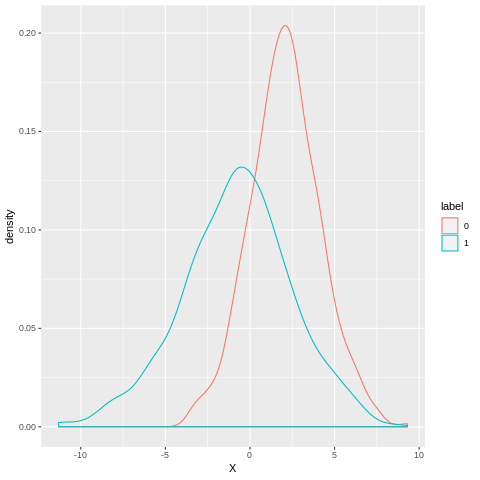

In [26]:
%%R

# Your data consists of an "X" column and a "label" column
# Use ggplot to plot a kernel density estimate of each label (overlayed on the same plot)
# hint: don't forget to make sure the labels are factors!

ggplot(dat,aes(X,colour=label))+geom_density()


# Problem 2: Using Classes in Python

In [31]:
from abc import ABC, abstractmethod
from math import sqrt
from random import shuffle

def smart_zip(a,b):
    try:
        return zip(a, b)
    except TypeError:
        return zip([a], [b])

class AbstractKNeighbors(ABC):
    def __init__(self, K):
        self.K = K

    def fit(self, X, y):
        """ Train the model!

        X should be a list of data points
        y should be a list of labels
        """
        self.X = X
        self.y = y
        return self

    @abstractmethod
    def _make_prediction(self, labels):
        pass

    def predict(self, new_x):
        """Find the nearest K neighbors
        
        new_x should be a single data point
        """

        dists = [sqrt(sum(([(i-j)**2 for i,j in smart_zip(x,new_x)])))
                 for x in self.X]
        sorted_neighbors = sorted(enumerate(dists),
                                  key=lambda t: t[1])
        labels = [self.y[i] for i,_ in sorted_neighbors]
        return self._make_prediction(labels)


class KNearestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[:self.K])/self.K
        return round(avg)

class KFurthestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[-self.K:])/self.K
        return round(1 - avg)

In [28]:
from csv import reader

with open('classification_data.csv', 'r') as f:
    dat = list(reader(f))[1:]
    dat = [[float(x), int(label)] for x,label in dat]

## Problem 2.1: Shuffling!

In [32]:
# In your data, "X" is a data point that is nothing more than
# a single number. 
# Shuffle your data into a random order (use random.shuffle!)
def randomise(list):
    shuffle(list)
    
    
    


In [45]:
# Seems to be shuffling correctly

[[-2.3164922401287886, 1], [7.394755558505678, 0], [6.119113855360122, 0], [-0.3990900634056326, 1], [2.259284329539627, 0], [-4.271411144621791, 1], [2.9402679797829254, 0], [4.341559187594662, 0], [1.2257420306482834, 0], [-1.241001002371202, 1], [-3.1172915455517147, 0], [0.8886329354028268, 1], [0.6631246413758718, 0], [-1.3045408090446569, 0], [3.092456915960364, 0], [0.34727551847582316, 1], [0.21899516589037948, 1], [1.491055413380272, 1], [1.856923683627106, 0], [-6.419893661092217, 1], [1.2979195299961905, 0], [0.29920741011431606, 0], [7.060965960730799, 1], [3.5003002586761696, 1], [0.9633122641416179, 0], [1.3339260471690881, 0], [3.627821489479345, 0], [0.827480082244451, 0], [-2.1343280863410596, 1], [-1.164068138103106, 1], [-0.36799323379095217, 1], [0.05176882532535254, 0], [-2.9392179249659365, 1], [3.362962787403635, 1], [0.8391388767857724, 0], [0.7387798483391128, 1], [-3.691876211375871, 1], [3.173046045225896, 0], [-3.6280819490620964, 1], [-0.7382259302817056, 1

In [46]:
# If you shuffled your data, this test should pass
# (i.e. not throw an error)

assert(sum([label for x,label in dat[:50]]) != 0)

## Problem 2.2: Splitting!

In [62]:
# Split your data, which is now a list, into 2 sublists:
# "train" and "test"
# The "train" group should have 700 elements
# The test group should have 300 elements
# Each group should have the same format as the original data
train = dat[0:700]
test = dat[-300:]

len(test)


300

In [65]:
dat[0][0]

-2.3164922401287886

In [74]:
# Now you will need to make another split, within the groups!
# For each group ("train" and "test") split the X's from the labels.
def splitter(list):
    X = [0]*len(list)
    label=[0]*len(list)
    for i in range(0,len(list)):
        X[i] = list[i][0]
        label[i] = list[i][1]
        
    return [X,label]
        

In [76]:
trainSplit = splitter(train)
testSplit = splitter(test)

## Problem 2.3: Testing models!

In [93]:
# For each model: 
# 1. Create an instance the class, with constructor parameters: K=5
# 2. Train the instance on the "train" groups X's and labels (y's)
# 3. Test how well the instance does: 
#    A. Use the trained instance to predict the label of each "X" in the "test" group
#    B. Use your "test" labels to see if the predicted label is equal the true label

# Instances
NearestInstance = KNearestNeighbors(5)
FurthestInstance = KFurthestNeighbors(5)


# Training
NearestInstance.fit(X=trainSplit[0],y=trainSplit[1])
FurthestInstance.fit(X=trainSplit[0],y=trainSplit[1])


# Test 
predN = [0]*len(testSplit[0])
predF = [0]*len(testSplit[0])

for x in range(0,len(testSplit[0])):
    predN[x] = NearestInstance.predict(new_x=testSplit[0][x])

for x in range(0,len(testSplit[0])):
    predF[x] = FurthestInstance.predict(new_x=testSplit[0][x])



In [94]:
len(predN)

300

In [92]:
# Compare the two classes of models!
len(NearestInstance.y)

700

In [95]:
predN

[1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [115]:
count = 0
for i in range(0,len(testSplit[1])):
    if(predN[i]==testSplit[1][i]):
        count = count+1
        

        
        
        
countF = 0
for i in range(0,len(testSplit[1])):
    if(predF[i]==testSplit[1][i]):
        countF = countF+1       

       
    


In [116]:
count

201

In [117]:
countF

210

In [ ]:
# 210 > 201, more matches in Furthest Neighbours